In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cleaning Parties csv

In [ ]:
#loading initial csv 
parties = pd.read_csv("parties.csv")

In [160]:
#making df
parties_df=pd.DataFrame(parties)

In [161]:
parties_df.head()

,id,case_id,party_number,party_type,at_fault,party_sex,party_age,party_sobriety,party_drug_physical,direction_of_travel,party_safety_equipment_1,party_safety_equipment_2,financial_responsibility,hazardous_materials,cellphone_in_use,cellphone_use_type,school_bus_related,oaf_violation_code,oaf_violation_category,oaf_violation_section,oaf_violation_suffix,other_associate_factor_1,other_associate_factor_2,party_number_killed,party_number_injured,movement_preceding_collision,vehicle_year,vehicle_make,statewide_vehicle_type,chp_vehicle_type_towing,chp_vehicle_type_towed,party_race
0,1,81715.0,1,driver,1,female,35.0,not applicable,not applicable,north,air bag deployed,lap/shoulder harness used,proof of insurance obtained,NaN,0.0,cellphone not in use,NaN,NaN,NaN,NaN,NaN,none apparent,NaN,0,0,proceeding straight,2007.0,ford,NaN,NaN,NaN,other
1,2,81715.0,2,driver,0,female,43.0,not applicable,not applicable,north,air bag not deployed,lap/shoulder harness used,proof of insurance obtained,NaN,0.0,cellphone not in use,NaN,NaN,NaN,NaN,NaN,none apparent,NaN,0,0,proceeding straight,2019.0,NaN,NaN,NaN,NaN,hispanic
2,3,726202.0,1,driver,1,NaN,NaN,impairment unknown,G,north,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none apparent,NaN,0,0,proceeding straight,2005.0,NaN,passenger car,"passenger car, station",NaN,NaN
3,4,3858022.0,1,driver,1,male,47.0,impairment unknown,G,east,air bag not deployed,lap/shoulder harness used,proof of insurance obtained,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other,NaN,0,0,NaN,2007.0,dodge,emergency vehicle,police car,00,black
4,5,3858022.0,2,driver,0,male,58.0,had not been drinking,NaN,east,air bag not deployed,lap/shoulder harness used,proof of insurance obtained,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stop and go traffic,NaN,0,0,NaN,2006.0,nissan,NaN,NaN,00,hispanic


In [162]:
parties_df.shape

(18669166, 32)

In [163]:
#checking unique values in columns
parties_df['party_drug_physical'].unique()

array(['not applicable', 'G', nan, 'impairment - physical',
       'under drug influence', 'sleepy/fatigued'], dtype=object)

In [165]:
#initial column headers
print(parties_df.columns)

Index(['id', 'case_id', 'party_number', 'party_type', 'at_fault', 'party_sex',
       'party_age', 'party_sobriety', 'party_drug_physical',
       'direction_of_travel', 'party_safety_equipment_1',
       'party_safety_equipment_2', 'financial_responsibility',
       'hazardous_materials', 'cellphone_in_use', 'cellphone_use_type',
       'school_bus_related', 'oaf_violation_code', 'oaf_violation_category',
       'oaf_violation_section', 'oaf_violation_suffix',
       'other_associate_factor_1', 'other_associate_factor_2',
       'party_number_killed', 'party_number_injured',
       'movement_preceding_collision', 'vehicle_year', 'vehicle_make',
       'statewide_vehicle_type', 'chp_vehicle_type_towing',
       'chp_vehicle_type_towed', 'party_race'],
      dtype='object')


In [299]:
#pulling wanted columns for new dataframe instead of dropping columns
#having some issues fixing data types that we'll need to come back to
party_df_2 = parties_df[['case_id', 'party_number', 'party_type', 'at_fault', 'party_sex', 'party_age', 'party_sobriety', 'party_drug_physical', 'party_safety_equipment_1', 'party_safety_equipment_2', 'cellphone_use_type', 'oaf_violation_category', 'party_number_killed', 'party_number_injured', 'movement_preceding_collision', 'vehicle_year', 'vehicle_make', 'party_race']].copy()


In [301]:
party_df_2.shape

(18669166, 18)

In [322]:
party_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18669166 entries, 0 to 18669165
Data columns (total 18 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   case_id                       float64
 1   party_number                  int64  
 2   party_type                    object 
 3   at_fault                      int64  
 4   party_sex                     object 
 5   party_age                     float64
 6   party_sobriety                object 
 7   party_drug_physical           object 
 8   party_safety_equipment_1      object 
 9   party_safety_equipment_2      object 
 10  cellphone_use_type            object 
 11  oaf_violation_category        object 
 12  party_number_killed           int64  
 13  party_number_injured          int64  
 14  movement_preceding_collision  object 
 15  vehicle_year                  float64
 16  vehicle_make                  object 
 17  party_race                    object 
dtypes: float64(3), int64

In [325]:
party_df_2['vehicle_year'].isna().sum()

1777184

In [70]:
#resaving csv version 2
party_df_2.to_csv(f"D:\Computer Courses\LHL Data Bootcamp\LHL Projects\Midterm Project\parties_2.csv", index=False)
print(f"DataFrame exported")

DataFrame exported


In [ ]:
print(party_df_2.columns)

Index(['case_id', 'party_number', 'party_type', 'at_fault', 'party_sex',
       'party_age', 'party_sobriety', 'party_drug_physical',
       'party_safety_equipment_1', 'party_safety_equipment_2',
       'cellphone_use_type', 'oaf_violation_category', 'party_number_killed',
       'party_number_injured', 'movement_preceding_collision', 'vehicle_year',
       'vehicle_make', 'party_race'],
      dtype='object')


In [ ]:
party_df_2['case_id'].unique()

array([-1], dtype=int64)

-----------
-----
-----

In [ ]:
#import most version 2
party_df_2 = pd.read_csv("parties_2.csv")

In [79]:
party_df_2.head(1)

,case_id,party_number,party_type,at_fault,party_sex,party_age,party_sobriety,party_drug_physical,party_safety_equipment_1,party_safety_equipment_2,cellphone_use_type,oaf_violation_category,party_number_killed,party_number_injured,movement_preceding_collision,vehicle_year,vehicle_make,party_race
0,81715.0,1,driver,1,female,35.0,not applicable,not applicable,air bag deployed,lap/shoulder harness used,cellphone not in use,NaN,0,0,proceeding straight,2007.0,ford,other


In [82]:
#pulling wanted columns
party_df_3 = party_df_2[['case_id', 'party_number', 'party_type', 'at_fault', 'party_sex', 'party_age', 'party_safety_equipment_1', 'party_safety_equipment_2', 'cellphone_use_type', 'oaf_violation_category', 'party_number_killed', 'party_number_injured', 'movement_preceding_collision', 'vehicle_year', 'vehicle_make', 'party_race']].copy()


In [85]:
party_df_3.shape

(18669166, 16)

In [86]:
#resaving csv version 3
party_df_3.to_csv(f"D:\Computer Courses\LHL Data Bootcamp\LHL Projects\Midterm Project\parties_3.csv", index=False)
print(f"DataFrame exported")

DataFrame exported


In [116]:
party_df_3.head(1)

,case_id,party_number,party_type,at_fault,party_sex,party_age,party_safety_equipment_1,party_safety_equipment_2,cellphone_use_type,oaf_violation_category,party_number_killed,party_number_injured,movement_preceding_collision,vehicle_year,vehicle_make,party_race
0,81715.0,1,driver,1,female,35.0,air bag deployed,lap/shoulder harness used,cellphone not in use,NaN,0,0,proceeding straight,2007.0,ford,other


----
----
----

In [ ]:
#loading csv verion 3
party_df_3 = pd.read_csv(f"..\data\parties_3.csv")

In [13]:
party_df_3.head(1)

,case_id,party_number,party_type,at_fault,party_sex,party_age,party_safety_equipment_1,party_safety_equipment_2,cellphone_use_type,oaf_violation_category,party_number_killed,party_number_injured,movement_preceding_collision,vehicle_year,vehicle_make,party_race
0,81715.0,1,driver,1,female,35.0,air bag deployed,lap/shoulder harness used,cellphone not in use,NaN,0,0,proceeding straight,2007.0,ford,other


In [36]:
party_df_3['party_number'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92], dtype=int64)

In [37]:
#pulling wanted columns
party_df_4 = party_df_3[['case_id', 'party_number', 'at_fault', 'party_sex', 'party_age', 'party_safety_equipment_1', 'party_safety_equipment_2', 'cellphone_use_type', 'oaf_violation_category', 'party_number_killed', 'party_number_injured', 'movement_preceding_collision', 'vehicle_year', 'vehicle_make', 'party_race']].copy()


In [39]:
party_df_4.head(1)

,case_id,party_number,at_fault,party_sex,party_age,party_safety_equipment_1,party_safety_equipment_2,cellphone_use_type,oaf_violation_category,party_number_killed,party_number_injured,movement_preceding_collision,vehicle_year,vehicle_make,party_race
0,81715.0,1,1,female,35.0,air bag deployed,lap/shoulder harness used,cellphone not in use,NaN,0,0,proceeding straight,2007.0,ford,other


In [42]:
#resaving csv version 4
party_df_4.to_csv(f"D:\Computer Courses\LHL Data Bootcamp\LHL Projects\Midterm Project\LHL-Midterm-Project\data\parties_4.csv", index=False)
print(f"DataFrame exported")

DataFrame exported


# Cleaning collisions csv

In [ ]:
#import original collision csv
collisions = pd.read_csv("D:\Computer Courses\LHL Data Bootcamp\LHL Projects\Midterm Project\data csv versions\collisions.csv")

In [45]:
#create dataframe version 1
collisions_df=pd.DataFrame(collisions)

In [46]:
collisions_df.shape

(9424334, 75)

In [47]:
collisions_df.head(1)

,case_id,jurisdiction,officer_id,reporting_district,chp_shift,population,county_city_location,county_location,special_condition,beat_type,chp_beat_type,city_division_lapd,chp_beat_class,beat_number,primary_road,secondary_road,distance,direction,intersection,weather_1,weather_2,state_highway_indicator,caltrans_county,caltrans_district,state_route,route_suffix,postmile_prefix,postmile,location_type,ramp_intersection,side_of_highway,tow_away,collision_severity,killed_victims,injured_victims,party_count,primary_collision_factor,pcf_violation_code,pcf_violation_category,pcf_violation,pcf_violation_subsection,hit_and_run,type_of_collision,motor_vehicle_involved_with,pedestrian_action,road_surface,road_condition_1,road_condition_2,lighting,control_device,chp_road_type,pedestrian_collision,bicycle_collision,motorcycle_collision,truck_collision,not_private_property,alcohol_involved,statewide_vehicle_type_at_fault,chp_vehicle_type_at_fault,severe_injury_count,other_visible_injury_count,complaint_of_pain_injury_count,pedestrian_killed_count,pedestrian_injured_count,bicyclist_killed_count,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count,primary_ramp,secondary_ramp,latitude,longitude,collision_date,collision_time,process_date
0,81715.0,1941.0,11342,212,not chp,>250000,1941,los angeles,0.0,not chp,not chp,NaN,not chp,003,PATTERSON ST,ATLANTIC AV,0.0,NaN,1.0,cloudy,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,property damage only,0.0,0.0,2.0,vehicle code violation,NaN,speeding,22350.0,NaN,not hit and run,rear end,other motor vehicle,no pedestrian involved,dry,normal,NaN,daylight,none,0,0,0,0,0,1.0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,2020-03-14,07:45:00,2020-06-22


In [50]:
#create new df using specific columns
collisions_df2=collisions_df[['case_id', 'population', 'county_location', 'primary_road', 'secondary_road', 'intersection', 'weather_1', 'weather_2', 'caltrans_district', 'state_route', 'route_suffix', 'location_type', 'collision_severity', 'killed_victims', 'injured_victims','party_count', 'primary_collision_factor','pcf_violation_category','hit_and_run', 'type_of_collision', 'motor_vehicle_involved_with','pedestrian_action', 'road_surface', 'road_condition_1','road_condition_2', 'lighting', 'alcohol_involved', 'chp_vehicle_type_at_fault', 'pedestrian_killed_count','pedestrian_injured_count', 'bicyclist_killed_count','bicyclist_injured_count', 'motorcyclist_killed_count', 'motorcyclist_injured_count','latitude', 'longitude', 'collision_date', 'collision_time','process_date']].copy()


In [51]:
collisions_df2.head(1)

,case_id,population,county_location,primary_road,secondary_road,intersection,weather_1,weather_2,caltrans_district,state_route,route_suffix,location_type,collision_severity,killed_victims,injured_victims,party_count,primary_collision_factor,pcf_violation_category,hit_and_run,type_of_collision,motor_vehicle_involved_with,pedestrian_action,road_surface,road_condition_1,road_condition_2,lighting,alcohol_involved,chp_vehicle_type_at_fault,pedestrian_killed_count,pedestrian_injured_count,bicyclist_killed_count,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count,latitude,longitude,collision_date,collision_time,process_date
0,81715.0,>250000,los angeles,PATTERSON ST,ATLANTIC AV,1.0,cloudy,NaN,NaN,NaN,NaN,NaN,property damage only,0.0,0.0,2.0,vehicle code violation,speeding,not hit and run,rear end,other motor vehicle,no pedestrian involved,dry,normal,NaN,daylight,NaN,NaN,0,0,0,0,0,0.0,NaN,NaN,2020-03-14,07:45:00,2020-06-22


In [52]:
collisions_df2.shape

(9424334, 39)

In [188]:
#creating column to contain info from these 4 columns
for index, row in collisions_df2.iterrows():
    if row['pedestrian_collision'] == 1:
        collisions_df2.at[index, 'collision_type'] = 'pedestrian'
    elif row['bicycle_collision'] == 1:
        collisions_df2.at[index, 'collision_type'] = 'bicycle'
    elif row['motorcycle_collision'] == 1:
        collisions_df2.at[index, 'collision_type'] = 'motorcycle'
    elif row['truck_collision'] == 1:
        collisions_df2.at[index, 'collision_type'] = 'truck'

In [59]:
#creating new df with specific columns
collisions_df3=collisions_df2[['case_id', 'county_location', 'intersection', 'weather_1', 'weather_2', 'state_route', 'route_suffix', 'location_type', 'killed_victims', 'injured_victims','party_count', 'primary_collision_factor','pcf_violation_category','hit_and_run', 'type_of_collision', 'motor_vehicle_involved_with','pedestrian_action', 'road_surface', 'road_condition_1','road_condition_2', 'lighting', 'alcohol_involved', 'chp_vehicle_type_at_fault', 'pedestrian_killed_count','pedestrian_injured_count', 'bicyclist_killed_count','bicyclist_injured_count', 'motorcyclist_killed_count', 'motorcyclist_injured_count','latitude', 'longitude', 'collision_date', 'collision_time']].copy()


In [60]:
collisions_df3.shape

(9424334, 33)

In [61]:
collisions_df3.head(1)

,case_id,county_location,intersection,weather_1,weather_2,state_route,route_suffix,location_type,killed_victims,injured_victims,party_count,primary_collision_factor,pcf_violation_category,hit_and_run,type_of_collision,motor_vehicle_involved_with,pedestrian_action,road_surface,road_condition_1,road_condition_2,lighting,alcohol_involved,chp_vehicle_type_at_fault,pedestrian_killed_count,pedestrian_injured_count,bicyclist_killed_count,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count,latitude,longitude,collision_date,collision_time
0,81715.0,los angeles,1.0,cloudy,NaN,NaN,NaN,NaN,0.0,0.0,2.0,vehicle code violation,speeding,not hit and run,rear end,other motor vehicle,no pedestrian involved,dry,normal,NaN,daylight,NaN,NaN,0,0,0,0,0,0.0,NaN,NaN,2020-03-14,07:45:00


In [ ]:
#comparing to party df to see if we can get rid of some more columns

In [ ]:
party_df_4.head(2)

,case_id,party_number,at_fault,party_sex,party_age,party_safety_equipment_1,party_safety_equipment_2,cellphone_use_type,oaf_violation_category,party_number_killed,party_number_injured,movement_preceding_collision,vehicle_year,vehicle_make,party_race
0,81715.0,1,1,female,35.0,air bag deployed,lap/shoulder harness used,cellphone not in use,NaN,0,0,proceeding straight,2007.0,ford,other
1,81715.0,2,0,female,43.0,air bag not deployed,lap/shoulder harness used,cellphone not in use,NaN,0,0,proceeding straight,2019.0,NaN,hispanic


In [ ]:
collisions_df3['alcohol_involved'].unique()

array([nan,  1.,  0.])

In [67]:
#resaving csv version 3
collisions_df3.to_csv(f"D:\Computer Courses\LHL Data Bootcamp\LHL Projects\Midterm Project\collisions_df3.csv", index=False)
print(f"DataFrame exported")

DataFrame exported


---
---
---

In [71]:
collisions_df3.head(1)

,case_id,county_location,intersection,weather_1,weather_2,state_route,route_suffix,location_type,killed_victims,injured_victims,party_count,primary_collision_factor,pcf_violation_category,hit_and_run,type_of_collision,motor_vehicle_involved_with,pedestrian_action,road_surface,road_condition_1,road_condition_2,lighting,alcohol_involved,chp_vehicle_type_at_fault,pedestrian_killed_count,pedestrian_injured_count,bicyclist_killed_count,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count,latitude,longitude,collision_date,collision_time
0,81715.0,los angeles,1.0,cloudy,NaN,NaN,NaN,NaN,0.0,0.0,2.0,vehicle code violation,speeding,not hit and run,rear end,other motor vehicle,no pedestrian involved,dry,normal,NaN,daylight,NaN,NaN,0,0,0,0,0,0.0,NaN,NaN,2020-03-14,07:45:00


In [73]:
#creating new df with specific columns
collisions_df4=collisions_df3[['case_id', 'county_location', 'intersection', 'weather_1', 'weather_2', 'state_route', 'location_type', 'killed_victims', 'injured_victims','party_count', 'primary_collision_factor','pcf_violation_category','hit_and_run', 'type_of_collision', 'motor_vehicle_involved_with','pedestrian_action', 'road_surface', 'road_condition_1','road_condition_2', 'lighting', 'alcohol_involved', 'chp_vehicle_type_at_fault', 'pedestrian_killed_count','pedestrian_injured_count', 'bicyclist_killed_count','bicyclist_injured_count', 'motorcyclist_killed_count', 'motorcyclist_injured_count','latitude', 'longitude', 'collision_date', 'collision_time']].copy()


In [74]:
collisions_df4.shape

(9424334, 32)

In [75]:
#changing collision date to datetime again
collisions_df4['collision_date'] = pd.to_datetime(collisions_df4['collision_date'])

In [76]:
collisions_df4['years'] = collisions_df4['collision_date'].dt.strftime('%Y')

In [77]:
collisions_df4['years'].unique()

array(['2020', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2021', '2019', '2008', '2002', '2003',
       '2001', '2004', '2005', '2006', '2007'], dtype=object)

In [78]:
#removing data from earlier years
years_to_drop = ['2001', '2002', '2003', '2004', '2005']

collisions_df4 = collisions_df4[~collisions_df4['years'].isin(years_to_drop)]

In [79]:
collisions_df4['years'].unique()

array(['2020', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2021', '2019', '2008', '2006', '2007'],
      dtype=object)

In [80]:
collisions_df4.shape

(6747057, 33)

In [12]:
#comparing columns to see if we can reduce our data size

In [83]:
collisions_df4['weather_1'].unique()

array(['cloudy', 'clear', 'raining', 'fog', nan, 'snowing', 'wind',
       'other'], dtype=object)

In [84]:
collisions_df4['weather_2'].unique()

array([nan, 'raining', 'wind', 'fog', 'cloudy', 'other', 'snowing',
       'clear'], dtype=object)

In [85]:
collisions_df4['weather_1'].isna().sum()

28172

In [86]:
collisions_df4['weather_2'].isna().sum()

6564715

In [95]:
#creating new df with specific columns
collisions_df5=collisions_df4[['case_id', 'county_location', 'weather_1', 'weather_2', 'state_route', 'killed_victims', 'injured_victims','party_count', 'pcf_violation_category', 'pedestrian_action', 'road_surface', 'lighting', 'alcohol_involved', 'pedestrian_killed_count','pedestrian_injured_count', 'bicyclist_killed_count','bicyclist_injured_count', 'motorcyclist_killed_count', 'motorcyclist_injured_count','latitude', 'longitude', 'collision_date', 'collision_time']].copy()


In [96]:
#resaving csv version 5
collisions_df5.to_csv(f"D:\Computer Courses\LHL Data Bootcamp\LHL Projects\Midterm Project\LHL-Midterm-Project\data\collisions_df5.csv", index=False)
print(f"DataFrame exported")

DataFrame exported


## Changing Data Types to more useable types in tableau

In [60]:
collisions_df5 = pd.read_csv('csvs2/collisions_df5.csv', low_memory=False)
parties_4 = pd.read_csv('csvs2/parties_4.csv', low_memory=False)

In [61]:
# Convert the 'case_id' to integer for both dfs
collisions_df5['case_id'] = collisions_df5['case_id'].astype(int)
parties_4['case_id'] = parties_4['case_id'].astype(int)

In [62]:
# Convert "collision_date" from string to date type
collisions_df5['collision_date'] = pd.to_datetime(collisions_df5['collision_date'])

In [63]:
# Convert the 'collision_time' column to a time data type
collisions_df5['collision_time'] = pd.to_datetime(collisions_df5['collision_time'], format='%H:%M:%S').dt.time

In [64]:
collisions_df5.head()

,case_id,county_location,weather_1,weather_2,state_route,killed_victims,injured_victims,party_count,pcf_violation_category,pedestrian_action,...,pedestrian_killed_count,pedestrian_injured_count,bicyclist_killed_count,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count,latitude,longitude,collision_date,collision_time
0,81715,los angeles,cloudy,NaN,NaN,0.0,0.0,2.0,speeding,no pedestrian involved,...,0,0,0,0,0,0.0,NaN,NaN,2020-03-14,07:45:00
1,726202,san bernardino,clear,NaN,NaN,0.0,0.0,1.0,speeding,no pedestrian involved,...,0,0,0,0,0,0.0,NaN,NaN,2020-07-26,02:50:00
2,3858022,fresno,clear,NaN,NaN,0.0,0.0,2.0,other improper driving,no pedestrian involved,...,0,0,0,0,0,0.0,NaN,NaN,2009-02-03,17:11:00
3,3899441,del norte,clear,NaN,101.0,0.0,0.0,1.0,improper turning,no pedestrian involved,...,0,0,0,0,0,0.0,NaN,NaN,2009-02-28,01:45:00
4,3899442,los angeles,raining,NaN,110.0,0.0,0.0,2.0,speeding,no pedestrian involved,...,0,0,0,0,0,0.0,33.86465,-118.28533,2009-02-09,10:20:00


In [65]:
# The time column was not reading correctly in tableau, so we will extract the hour from this time instead and create a column called 'collision_hour'
# Define a custom function to extract the hour component and convert it to an integer
def extract_hour(time_obj):
    return time_obj.hour

# Apply the custom function to the 'collision_time' column to create a new 'hour' column
collisions_df5['collision_hour'] = collisions_df5['collision_time'].apply(extract_hour)

In [66]:
#Remove the collision_time column
del collisions_df5['collision_time']

In [67]:
#Check for NaN values in collision_hour
collisions_df5['collision_hour'].isna().sum()

61921

In [68]:
#Remove rows that have no recorded time
collisions_df5 = collisions_df5.dropna(subset=['collision_hour'])

In [69]:
#Change float columns that are counts to integers for ease of readability (ie. victims killed = 1 instead of 1.0). Also changing NaN values to 0.
collisions_df5['killed_victims'] = collisions_df5['killed_victims'].fillna(0).astype(int)
collisions_df5['injured_victims'] = collisions_df5['injured_victims'].fillna(0).astype(int)
collisions_df5['party_count'] = collisions_df5['party_count'].fillna(0).astype(int)
collisions_df5['motorcyclist_injured_count'] = collisions_df5['motorcyclist_injured_count'].fillna(0).astype(int)
collisions_df5['collision_hour'] = collisions_df5['collision_hour'].astype(int)
parties_4['party_age'] = parties_4['party_age'].fillna(0).astype(int)

In [70]:
collisions_df5.head()

,case_id,county_location,weather_1,weather_2,state_route,killed_victims,injured_victims,party_count,pcf_violation_category,pedestrian_action,...,pedestrian_killed_count,pedestrian_injured_count,bicyclist_killed_count,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count,latitude,longitude,collision_date,collision_hour
0,81715,los angeles,cloudy,NaN,NaN,0,0,2,speeding,no pedestrian involved,...,0,0,0,0,0,0,NaN,NaN,2020-03-14,7
1,726202,san bernardino,clear,NaN,NaN,0,0,1,speeding,no pedestrian involved,...,0,0,0,0,0,0,NaN,NaN,2020-07-26,2
2,3858022,fresno,clear,NaN,NaN,0,0,2,other improper driving,no pedestrian involved,...,0,0,0,0,0,0,NaN,NaN,2009-02-03,17
3,3899441,del norte,clear,NaN,101.0,0,0,1,improper turning,no pedestrian involved,...,0,0,0,0,0,0,NaN,NaN,2009-02-28,1
4,3899442,los angeles,raining,NaN,110.0,0,0,2,speeding,no pedestrian involved,...,0,0,0,0,0,0,33.86465,-118.28533,2009-02-09,10


## Chopping the size of collisions and parties table because they are still too big for tableau

In [84]:
# Define the date range for filtering
start_date = pd.to_datetime('2015-01-01')

# Use boolean indexing to filter the DataFrame
collisions_df6 = collisions_df5[(collisions_df5['collision_date'] >= start_date)]

In [85]:
collisions_df6.shape

(2840714, 23)

## Filter out any case_ids from the parties df that have been removed from the collision table

In [86]:
parties_4.shape

(18669166, 15)

In [87]:
#Create a list of all unique case_ids from the collisions table
unique_case_ids = collisions_df6['case_id'].unique()

In [88]:
#Create a new parties df without any case_ids that don't appear in this list of case_ids in collisions table
parties_5 = parties_4[parties_4['case_id'].isin(unique_case_ids)]

In [89]:
parties_5.shape

(5662391, 15)

## Let's check the ages of the people who were classified as "at fault" in an accident
#### We should only be seeing ages of legal driving age and ages less than 100.  Any that aren't we should remove

In [92]:
#Check the ages of all the people who were at fault in a collision
at_fault_ages = parties_5.loc[parties_5['at_fault']==1, 'party_age']

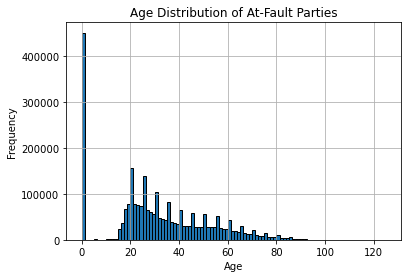

In [95]:
# Create a histogram of at_fault_ages
plt.hist(at_fault_ages, bins=100, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of At-Fault Parties')
plt.grid(True)

# Show the histogram
plt.show()

In [96]:
#locate all case_ids that have a party_age of less than 14 or greater than 100 and an at_fault value of 1, then display the rows with these case_ids
problematic_cases = parties_5.loc[((parties_5['party_age']<15) | (parties_5['party_age']>100)) & (parties_5['at_fault']==1), 'case_id']

In [97]:
len(parties_5[parties_5['case_id'].isin(problematic_cases.values)]['case_id'].unique())

462126

In [99]:
len(parties_5['case_id'].unique())

2840714

In [100]:
# Remove all cases where the age is less than 15 and is claimed at fault - since legal driving age for a beginner's permit in California is 15yr 6mos.
# Also at fault drivers who are over 100 since most of the population doesn't drive that long
parties_agefiltered = parties_5[~parties_5['case_id'].isin(problematic_cases)]
collisions_agefiltered = collisions_df6[~collisions_df6['case_id'].isin(problematic_cases)]

In [101]:
#Check the ages of all the people who were at fault in a collision again
at_fault_ages = parties_agefiltered.loc[parties_agefiltered['at_fault']==1, 'party_age']

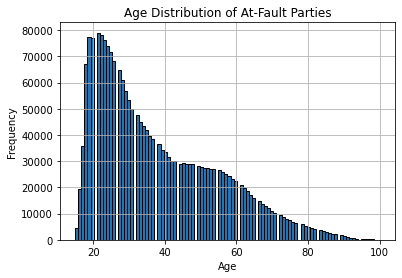

In [102]:
# Create a histogram of at_fault_ages
plt.hist(at_fault_ages, bins=100, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of At-Fault Parties')
plt.grid(True)

# Show the histogram
plt.show()

#### This range of values looks a lot better.

## Removing Categories column from Parties table since there is already one in the Collisions Table

In [104]:
parties_agefiltered.columns

Index(['case_id', 'party_number', 'at_fault', 'party_sex', 'party_age',
       'party_safety_equipment_1', 'party_safety_equipment_2',
       'cellphone_use_type', 'oaf_violation_category', 'party_number_killed',
       'party_number_injured', 'movement_preceding_collision', 'vehicle_year',
       'vehicle_make', 'party_race'],
      dtype='object')

In [105]:
del parties_agefiltered['oaf_violation_category']

In [106]:
parties_agefiltered.columns

Index(['case_id', 'party_number', 'at_fault', 'party_sex', 'party_age',
       'party_safety_equipment_1', 'party_safety_equipment_2',
       'cellphone_use_type', 'party_number_killed', 'party_number_injured',
       'movement_preceding_collision', 'vehicle_year', 'vehicle_make',
       'party_race'],
      dtype='object')

# Create a new column in the parties table that categorizes ages by age range.

In [111]:
# Define the age bins and labels
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, float('inf')]
labels = ['0 - 9', '10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80 - 89', '>90']

# Create a new column 'age_range' based on the 'age' column
parties_agefiltered['age_range'] = pd.cut(parties_agefiltered['party_age'], bins=bins, labels=labels, right=False)

<ipython-input-111-e29903dfec7b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parties_agefiltered['age_range'] = pd.cut(parties_agefiltered['party_age'], bins=bins, labels=labels, right=False)


In [112]:
parties_agefiltered.head()

,case_id,party_number,at_fault,party_sex,party_age,party_safety_equipment_1,party_safety_equipment_2,cellphone_use_type,party_number_killed,party_number_injured,movement_preceding_collision,vehicle_year,vehicle_make,party_race,age_range
0,81715,1,1,female,35,air bag deployed,lap/shoulder harness used,cellphone not in use,0,0,proceeding straight,2007.0,ford,other,30 - 39
1,81715,2,0,female,43,air bag not deployed,lap/shoulder harness used,cellphone not in use,0,0,proceeding straight,2019.0,NaN,hispanic,40 - 49
3845586,6292116,1,0,NaN,0,NaN,NaN,NaN,0,0,proceeding straight,NaN,ford,NaN,0 - 9
3845587,6292116,2,1,male,32,NaN,NaN,NaN,1,0,NaN,NaN,NaN,hispanic,30 - 39
3845588,6292116,3,0,female,51,air bag not deployed,lap/shoulder harness used,cellphone not in use,0,0,proceeding straight,2006.0,chrysler,other,50 - 59


## Turn DFs into csvs to use in Tableau

In [114]:
parties_agefiltered.to_csv('parties.csv', index=False)

In [113]:
collisions_agefiltered.to_csv('collisions.csv', index=False)